# Modelling Greenspace Metrics

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from pygam import LinearGAM, s, l
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#! pip install pygam

## 1. Modelling greenspace metrics at 100m

In [3]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_100_df.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,Grass%_100,Shrubs%_100,geometry
0,0.536433,0.414039,0.201814,0.097506,0.106576,POINT (377971.171 402346.176)
1,0.571965,0.551457,0.108844,0.072562,0.340136,POINT (364310.461 403435.100)
2,0.455587,0.256395,0.129252,0.092971,0.043084,POINT (369566.841 406840.228)
3,0.816160,0.942891,0.009070,0.249433,0.068027,POINT (354567.818 412168.416)
4,0.526997,0.388459,0.217687,0.061224,0.111111,POINT (388526.382 403175.927)


### 1.1. How does NDVI predict Greenspace%?

#### 1.1.1. Linear Regression Model

In [4]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [5]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [1.52623471]
Intercept: -0.3532229391349676
R-squared: 0.6672219453214692


In [6]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [7]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10923509565781504
Mean Squared Error: 0.022179959187710638
Root Mean Squared Error: 0.14892937651017893


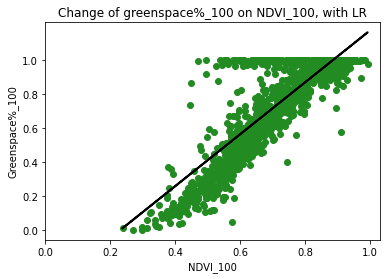

In [8]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of greenspace%_100 on NDVI_100, with LR')
plt.xlabel('NDVI_100')
plt.ylabel('Greenspace%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_greenspace_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
# predict Greenspace%_100 values for NDVI equalt to 0.3
X_t_0 = [[0.3]]
y_t_0 = model_100.predict(X_t_0)
print(model_100.predict(X_t_0))

[0.10464748]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
# predict Greenspace%_100 values for NDVI equalt to 0.4
X_t_1 = [[0.4]]
y_t_1 = model_100.predict(X_t_1)
print(model_100.predict(X_t_1))

[0.25727095]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# how does Greenspace%_100 increase if NDVI goes from 0.3 to 0.4?
#print('Greenspace%_100 increase if NDVI goes from 0.3 to 0.4:', y_t_1 - y_t_0)
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', y_t_1 - y_t_0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.15262347]


#### 1.1.2. Generalized Additive Model (GAM)

In [12]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Greenspace%_100
target_100 = pd.DataFrame(gdf_100, columns=['Greenspace%_100'])

# define X and Y
X = df_100
y = target_100['Greenspace%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_green_100 = LinearGAM(s(0)).fit(X_train, y_train)

gam_green_100.gridsearch(X_train, y_train)
gam_green_100.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.9404
Link Function:                     IdentityLink Log Likelihood:                                -88160.4417
Number of Samples:                         4673 AIC:                                           176336.7644
                                                AICc:                                          176336.7948
                                                GCV:                                                 0.023
                                                Scale:                                               0.023
                                                Pseudo R-Squared:                                   0.6936
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/2584159326.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_green_100.summary()


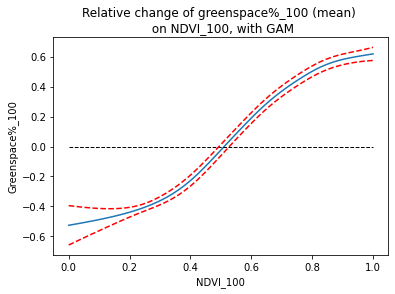

In [13]:
# plotting
for i, term in enumerate(gam_green_100.terms):
    if term.isintercept:
        continue

    XX = gam_green_100.generate_X_grid(term=i)
    pdep, confi = gam_green_100.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    # set title, xlabel and ylabel
    plt.title('Relative change of greenspace%_100 (mean) \n on NDVI_100, with GAM')
    plt.xlabel('NDVI_100')
    plt.ylabel('Greenspace%_100')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_greenspace_100_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [14]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_green_100.predict(0.25)
green_l1 = gam_green_100.predict(0.35)
green_sens_low = float(green_l1 - green_l0)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by:', green_sens_low)

If NDVI goes from 0.25 to 0.35, Greenspace%_100 increases by: 0.10103401447920335


In [15]:
# Change in mid NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_green_100.predict(0.45)
green_m1 = gam_green_100.predict(0.55)
green_sens_mid = float(green_m1 - green_m0)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by:', green_sens_mid)

If NDVI goes from 0.45 to 0.55, Greenspace%_100 increases by: 0.21570574291750838


In [16]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_green_100.predict(0.65)
green_h1 = gam_green_100.predict(0.75)
green_sens_hig = float(green_h1 - green_h0)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by:', green_sens_hig)

If NDVI goes from 0.65 to 0.75, Greenspace%_100 increases by: 0.15325252283656332


### 1.2. How does NDVI predict Canopy%?

#### 1.2.1. Linear Regression Model

In [17]:
# NDVI_100 as the predictor
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Canopy%_100 as the target
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [18]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [0.28301457]
Intercept: 0.0034142332616418913
R-squared: 0.05381919034084515


In [19]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [20]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1289016871958472
Mean Squared Error: 0.028822441599553744
Root Mean Squared Error: 0.16977173380617205


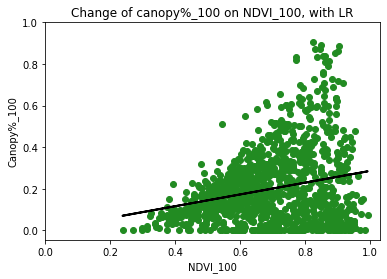

In [21]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of canopy%_100 on NDVI_100, with LR')
plt.xlabel('NDVI_100')
plt.ylabel('Canopy%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_canopy_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.2.2. Generalized Additive Model (GAM)

In [22]:
# data/predictors as the NDVI_100
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Canopy%_100
target = pd.DataFrame(gdf_100, columns=['Canopy%_100'])

# define X and Y
X = df
y = target['Canopy%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_canopy_100 = LinearGAM(s(0)).fit(X_train, y_train)

gam_canopy_100.gridsearch(X_train, y_train)
gam_canopy_100.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.9344
Link Function:                     IdentityLink Log Likelihood:                                -70124.4863
Number of Samples:                         4673 AIC:                                           140268.8413
                                                AICc:                                          140268.8879
                                                GCV:                                                0.0284
                                                Scale:                                              0.0283
                                                Pseudo R-Squared:                                   0.1164
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/2646037673.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_canopy_100.summary()


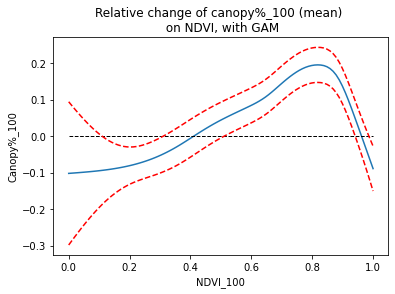

In [23]:
# plotting
for i, term in enumerate(gam_canopy_100.terms):
    if term.isintercept:
        continue

    XX = gam_canopy_100.generate_X_grid(term=i)
    pdep, confi = gam_canopy_100.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    # set title, xlabel and ylabel
    plt.title('Relative change of canopy%_100 (mean) \n on NDVI, with GAM')
    plt.xlabel('NDVI_100')
    plt.ylabel('Canopy%_100')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_canopy_100_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [24]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.25 to 0.35?
canopy_l0 = gam_canopy_100.predict(0.25)
canopy_l1 = gam_canopy_100.predict(0.35)
canopy_sens_low = float(canopy_l1 - canopy_l0)
print('If NDVI goes from 0.25 to 0.35, Canopy%_100 increases by:', canopy_sens_low)

If NDVI goes from 0.25 to 0.35, Canopy%_100 increases by: 0.037599578182805196


In [25]:
# Change in mid NDVI values: how does Canopy% increase, if NDVI changes from 0.45 to 0.55?
canopy_m0 = gam_canopy_100.predict(0.45)
canopy_m1 = gam_canopy_100.predict(0.55)
canopy_sens_mid = float(canopy_m1 - canopy_m0)
print('If NDVI goes from 0.45 to 0.55, Canopy%_100 increases by:', canopy_sens_mid)

If NDVI goes from 0.45 to 0.55, Canopy%_100 increases by: 0.04417468408305833


In [26]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.65 to 0.75?
canopy_h0 = gam_canopy_100.predict(0.65)
canopy_h1 = gam_canopy_100.predict(0.75)
canopy_sens_hig = float(canopy_h1 - canopy_h0)
print('If NDVI goes from 0.65 to 0.75, Canopy%_100 increases by:', canopy_sens_hig)

If NDVI goes from 0.65 to 0.75, Canopy%_100 increases by: 0.06734044235029735


### 1.3. How does NDVI predict Grass%?

#### 1.3.1. Linear Regression Model

In [27]:
# NDVI_100 as the predictor
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# Grass%_100 as the target
target = pd.DataFrame(gdf_100, columns=['Grass%_100'])

# define X and y
X = df
y = target['Grass%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [28]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [0.45144665]
Intercept: -0.15054825243325864
R-squared: 0.1438915198778541


In [29]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [30]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10756658205584864
Mean Squared Error: 0.024261264398270532
Root Mean Squared Error: 0.15576027862799466


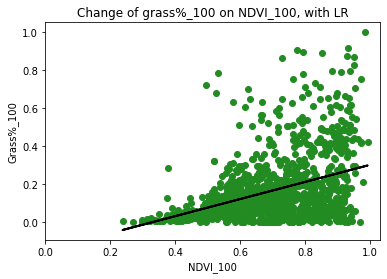

In [31]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of grass%_100 on NDVI_100, with LR')
plt.xlabel('NDVI_100')
plt.ylabel('Grass%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_grass_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [32]:
# how does Grass% increase, if NDVI changes from 0.25 to 0.35?
grass0 = model_100.predict([[0.25]])
grass1 = model_100.predict([[0.35]])
grass_sens_lr = float(grass1 - grass0)
print('If NDVI goes from 0.25 to 0.35, Grass%_100 increases by:', grass_sens_lr)

If NDVI goes from 0.25 to 0.35, Grass%_100 increases by: 0.045144664696341125


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 1.3.2. Generalized Additive Model (GAM)

In [33]:
# data/predictors as the NDVI_100
df = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Grass%_100
target = pd.DataFrame(gdf_100, columns=['Grass%_100'])

# define X and Y
X = df
y = target['Grass%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_grass_100 = LinearGAM(s(0)).fit(X_train, y_train)

gam_grass_100.gridsearch(X_train, y_train)
gam_grass_100.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.9344
Link Function:                     IdentityLink Log Likelihood:                                -80600.2742
Number of Samples:                         4673 AIC:                                           161220.4172
                                                AICc:                                          161220.4638
                                                GCV:                                                 0.025
                                                Scale:                                              0.0249
                                                Pseudo R-Squared:                                   0.1814
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/3444132048.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_grass_100.summary()


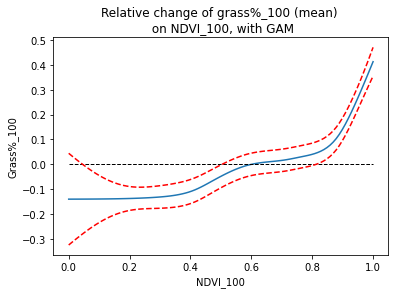

In [34]:
# plotting
for i, term in enumerate(gam_grass_100.terms):
    if term.isintercept:
        continue

    XX = gam_grass_100.generate_X_grid(term=i)
    pdep, confi = gam_grass_100.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    # set title, xlabel and ylabel
    plt.title('Relative change of grass%_100 (mean) \n on NDVI_100, with GAM')
    plt.xlabel('NDVI_100')
    plt.ylabel('Grass%_100')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_grass_100_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [35]:
# Change in low NDVI values: how does Grass% increase, if NDVI changes from 0.25 to 0.35?
grass_l0 = gam_grass_100.predict(0.25)
grass_l1 = gam_grass_100.predict(0.35)
grass_sens_low = float(grass_l1 - grass_l0)
print('If NDVI goes from 0.25 to 0.35, Grass%_100 increases by:', grass_sens_low)

If NDVI goes from 0.25 to 0.35, Grass%_100 increases by: 0.010868341441339038


In [36]:
# Change in mid NDVI values: how does Grass% increase, if NDVI changes from 0.45 to 0.55?
grass_m0 = gam_grass_100.predict(0.45)
grass_m1 = gam_grass_100.predict(0.55)
grass_sens_mid = float(grass_m1 - grass_m0)
print('If NDVI goes from 0.45 to 0.55, Grass%_100 increases by:', grass_sens_mid)

If NDVI goes from 0.45 to 0.55, Grass%_100 increases by: 0.06220137254354009


In [37]:
# Change in high NDVI values: how does Grass% increase, if NDVI changes from 0.65 to 0.75?
grass_h0 = gam_grass_100.predict(0.65)
grass_h1 = gam_grass_100.predict(0.75)
grass_sens_hig = float(grass_h1 - grass_h0)
print('If NDVI goes from 0.65 to 0.75, Grass%_100 increases by:', grass_sens_hig)

If NDVI goes from 0.65 to 0.75, Grass%_100 increases by: 0.017538271162339553


### 1.4. How does NDVI predict Shrubs%?

#### 1.4.1. Linear Regression Model

In [38]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Shrubs%_100
target_100 = pd.DataFrame(gdf_100, columns=['Shrubs%_100'])

# define X and y
X = df_100
y = target_100['Shrubs%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_100 = linear_model.LinearRegression()
model_100 = lm_100.fit(X_train,y_train)

In [39]:

# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_100 (or slope):', model_100.coef_)
print('Intercept:', model_100.intercept_)
print('R-squared:', model_100.score(X_train,y_train))

Coefficient of NDVI_100 (or slope): [0.77536403]
Intercept: -0.19881883205231377
R-squared: 0.1610487490528022


In [40]:
# make predictions
y_pred = model_100.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [41]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1878757630980801
Mean Squared Error: 0.06016331718853556
Root Mean Squared Error: 0.24528211754739798


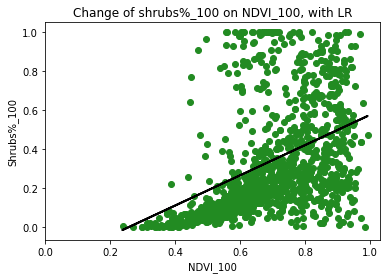

In [42]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of shrubs%_100 on NDVI_100, with LR')
plt.xlabel('NDVI_100')
plt.ylabel('Shrubs%_100')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_shrubs_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 1.4.2. Generalized Additive Model (GAM)

In [43]:
# data/predictors as the NDVI_100
df_100 = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# target as Shrubs%_100
target_100 = pd.DataFrame(gdf_100, columns=['Shrubs%_100'])

# define X and Y
X = df_100
y = target_100['Shrubs%_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_shrubs_100 = LinearGAM(s(0)).fit(X_train, y_train)

gam_shrubs_100.gridsearch(X_train, y_train)
gam_shrubs_100.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.2813
Link Function:                     IdentityLink Log Likelihood:                                 -26760.189
Number of Samples:                         4673 AIC:                                            53532.9406
                                                AICc:                                           53532.9602
                                                GCV:                                                0.0666
                                                Scale:                                              0.0664
                                                Pseudo R-Squared:                                   0.1717
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/455823317.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_shrubs_100.summary()


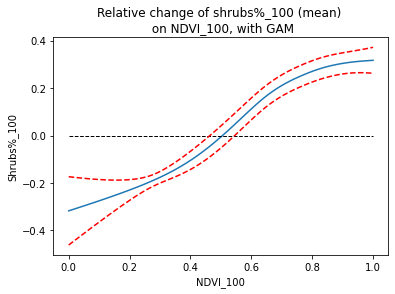

In [44]:
# plotting
for i, term in enumerate(gam_shrubs_100.terms):
    if term.isintercept:
        continue

    XX = gam_shrubs_100.generate_X_grid(term=i)
    pdep, confi = gam_shrubs_100.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    # set title, xlabel and ylabel
    plt.title('Relative change of shrubs%_100 (mean) \n on NDVI_100, with GAM')
    plt.xlabel('NDVI_100')
    plt.ylabel('Shrubs%_100')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_shrubs_100_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [45]:
# Change in low NDVI values: how does Shrubs% increase, if NDVI changes from 0.25 to 0.35?
shrubs_l0 = gam_shrubs_100.predict(0.25)
shrubs_l1 = gam_shrubs_100.predict(0.35)
shrubs_sens_low = float(shrubs_l1 - shrubs_l0)
print('If NDVI goes from 0.25 to 0.35, Shrubs%_100 increases by:', shrubs_sens_low)

If NDVI goes from 0.25 to 0.35, Shrubs%_100 increases by: 0.06083032784864256


In [46]:
# Change in mid NDVI values: how does Shrubs% increase, if NDVI changes from 0.45 to 0.55?
shrubs_m0 = gam_shrubs_100.predict(0.45)
shrubs_m1 = gam_shrubs_100.predict(0.55)
shrubs_sens_mid = float(shrubs_m1 - shrubs_m0)
print('If NDVI goes from 0.45 to 0.55, Shrubs%_100 increases by:', shrubs_sens_mid)

If NDVI goes from 0.45 to 0.55, Shrubs%_100 increases by: 0.11102418846354661


In [47]:
# Change in high NDVI values: how does Shrubs% increase, if NDVI changes from 0.65 to 0.75?
shrubs_h0 = gam_shrubs_100.predict(0.65)
shrubs_h1 = gam_shrubs_100.predict(0.75)
shrubs_sens_hig = float(shrubs_h1 - shrubs_h0)
print('If NDVI goes from 0.65 to 0.75, Shrubs%_100 increases by:', shrubs_sens_hig)

If NDVI goes from 0.65 to 0.75, Shrubs%_100 increases by: 0.07657062431426764


### 1.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [48]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
df = pd.DataFrame(gdf_100, columns=cols)

# target as NDVI_100
target = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# define X and Y
X = df
y = target['NDVI_100']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model gridsearch() iterable lambdas (one for each term)
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_ndvi_100 = LinearGAM().fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 3, 5)
lams = [lam] * 3

gam_ndvi_100.gridsearch(X_train, y_train, lam=lams)
gam_ndvi_100.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:09 Time:  0:00:09


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     40.3749
Link Function:                     IdentityLink Log Likelihood:                               -405426.8559
Number of Samples:                         4673 AIC:                                           810936.4616
                                                AICc:                                          810937.2188
                                                GCV:                                                0.0055
                                                Scale:                                              0.0054
                                                Pseudo R-Squared:                                   0.7485
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/2876185034.py:24: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_ndvi_100.summary()


<Figure size 432x288 with 0 Axes>

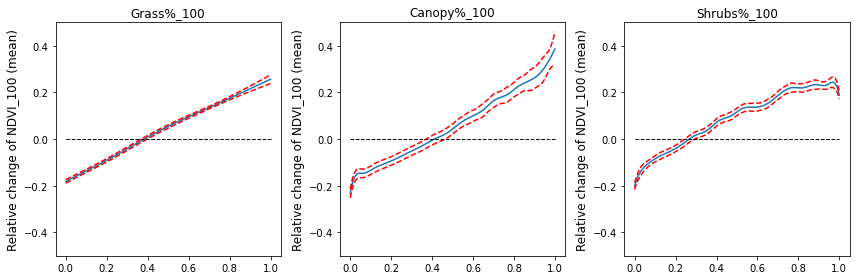

In [49]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3, figsize=(12,4));

titles = ['Grass%_100', 'Canopy%_100', 'Shrubs%_100']
for i, ax in enumerate(axs):
    XX = gam_ndvi_100.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_ndvi_100.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_ndvi_100.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_100 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_100_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 2. Modelling greenspace metrics at 300m

In [50]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_300_df.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,Grass%_300,Shrubs%_300,geometry
0,0.488255,0.955836,2.242873e-16,0.062290,0.421350,POINT (396607.971 420663.294)
1,0.531893,0.496460,2.145669e-01,0.128283,0.198172,POINT (357230.295 401556.298)
2,0.812246,0.932001,4.007312e-01,0.247811,0.353859,POINT (390380.102 385914.240)
3,0.949025,0.989765,4.611924e-02,0.185859,0.605270,POINT (374281.691 415010.143)
4,0.562222,0.574693,3.180540e-01,0.167677,0.148158,POINT (389574.066 388155.085)


### 2.1. How does NDVI predict Greenspace%?

#### 2.1.1. Linear Regression Model

In [51]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and y
X = df
y = target['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [52]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [1.20802165]
Intercept: -0.04725316511973132
R-squared: 0.6797081544466572


In [53]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [54]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09585366062489055
Mean Squared Error: 0.018247135846877663
Root Mean Squared Error: 0.13508195973881065


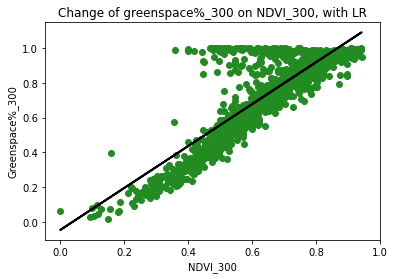

In [55]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of greenspace%_300 on NDVI_300, with LR')
plt.xlabel('NDVI_300')
plt.ylabel('Greenspace%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_greenspace_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [56]:
# Change in NDVI values: how does Greenspace% increase, if NDVI changes from 0.3 to 0.4?
green0 = model_300.predict([[0.3]])
green1 = model_300.predict([[0.4]])
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', green1 - green0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.12080216]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 2.1.2. Generalized Additive Model (GAM)

In [57]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Greenspace%_300
target_300 = pd.DataFrame(gdf_300, columns=['Greenspace%_300'])

# define X and Y
X = df_300
y = target_300['Greenspace%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_green_300 = LinearGAM(s(0)).fit(X_train, y_train)

gam_green_300.gridsearch(X_train, y_train)
gam_green_300.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.6321
Link Function:                     IdentityLink Log Likelihood:                               -122150.3757
Number of Samples:                         4688 AIC:                                           244318.0154
                                                AICc:                                           244318.051
                                                GCV:                                                0.0171
                                                Scale:                                              0.0171
                                                Pseudo R-Squared:                                   0.7008
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/832746388.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_green_300.summary()


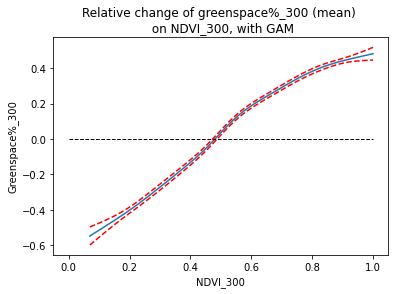

In [58]:
# plotting
for i, term in enumerate(gam_green_300.terms):
    if term.isintercept:
        continue

    XX = gam_green_300.generate_X_grid(term=i)
    pdep, confi = gam_green_300.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.7, 0.7)
    # set title, xlabel and ylabel
    plt.title('Relative change of greenspace%_300 (mean) \n on NDVI_300, with GAM')
    plt.xlabel('NDVI_300')
    plt.ylabel('Greenspace%_300')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_greenspace_300_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [59]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_green_300.predict(0.25)
green_l1 = gam_green_300.predict(0.35)
green_sens_low_300 = float(green_l1 - green_l0)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_300 increases by:', green_sens_low_300)

If NDVI goes from 0.25 to 0.35, Greenspace%_300 increases by: 0.13612591366458804


In [60]:
# Change in mid NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_green_300.predict(0.45)
green_m1 = gam_green_300.predict(0.55)
green_sens_mid_300 = float(green_m1 - green_m0)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_300 increases by:', green_sens_mid_300)

If NDVI goes from 0.45 to 0.55, Greenspace%_300 increases by: 0.17624247464368298


In [61]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_green_300.predict(0.65)
green_h1 = gam_green_300.predict(0.75)
green_sens_hig_300 = float(green_h1 - green_h0)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_300 increases by:', green_sens_hig_300)

If NDVI goes from 0.65 to 0.75, Greenspace%_300 increases by: 0.09916766379399944


### 2.2. How does NDVI predict Canopy%?

#### 2.2.1. Linear Regression Model

In [62]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Canopy%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and y
X = df
y = target['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [63]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [0.15997819]
Intercept: 0.11107283026524087
R-squared: 0.03513975496426869


In [64]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [65]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10230086415790655
Mean Squared Error: 0.01711882689419758
Root Mean Squared Error: 0.13083893493221954


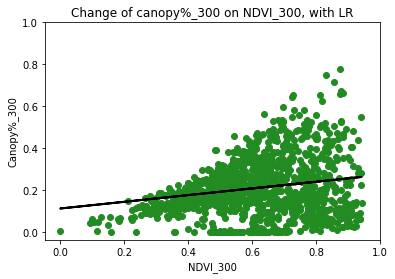

In [66]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of canopy%_300 on NDVI_300, with LR')
plt.xlabel('NDVI_300')
plt.ylabel('Canopy%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_canopy_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.2.2. Generalized Additive Model (GAM)

In [67]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Canopy%_300
target_300 = pd.DataFrame(gdf_300, columns=['Canopy%_300'])

# define X and Y
X = df_300
y = target_300['Canopy%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_canopy_300 = LinearGAM(s(0)).fit(X_train, y_train)

gam_canopy_300.gridsearch(X_train, y_train)
gam_canopy_300.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.8639
Link Function:                     IdentityLink Log Likelihood:                               -115681.2981
Number of Samples:                         4688 AIC:                                           231376.3239
                                                AICc:                                           231376.347
                                                GCV:                                                 0.018
                                                Scale:                                               0.018
                                                Pseudo R-Squared:                                   0.0719
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/1293149252.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_canopy_300.summary()


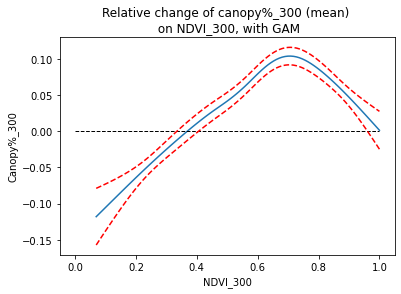

In [68]:
# plotting
for i, term in enumerate(gam_canopy_300.terms):
    if term.isintercept:
        continue

    XX = gam_canopy_300.generate_X_grid(term=i)
    pdep, confi = gam_canopy_300.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of canopy%_300 (mean) \n on NDVI_300, with GAM')
    plt.xlabel('NDVI_300')
    plt.ylabel('Canopy%_300')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_canopy_300_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [69]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.25 to 0.35?
canopy_l0 = gam_canopy_300.predict(0.25)
canopy_l1 = gam_canopy_300.predict(0.35)
canopy_sens_low_300 = float(canopy_l1 - canopy_l0)
print('If NDVI goes from 0.25 to 0.35, Canopy%_300 increases by:', canopy_sens_low_300)

If NDVI goes from 0.25 to 0.35, Canopy%_300 increases by: 0.03749582470927029


In [70]:
# Change in mid NDVI values: how does Canopy% increase, if NDVI changes from 0.45 to 0.55?
canopy_m0 = gam_canopy_300.predict(0.45)
canopy_m1 = gam_canopy_300.predict(0.55)
canopy_sens_mid_300 = float(canopy_m1 - canopy_m0)
print('If NDVI goes from 0.45 to 0.55, Canopy%_300 increases by:', canopy_sens_mid_300)

If NDVI goes from 0.45 to 0.55, Canopy%_300 increases by: 0.0320206722478823


In [71]:
# Change in high NDVI values: how does Canopy% increase, if NDVI changes from 0.65 to 0.75?
canopy_h0 = gam_canopy_300.predict(0.65)
canopy_h1 = gam_canopy_300.predict(0.75)
canopy_sens_hig_300 = float(canopy_h1 - canopy_h0)
print('If NDVI goes from 0.65 to 0.75, Canopy%_300 increases by:', canopy_sens_hig_300)

If NDVI goes from 0.65 to 0.75, Canopy%_300 increases by: 0.0028304599644339012


### 2.3. How does NDVI predict Grass%?

#### 2.3.1. Linear Regression Model

In [72]:
# NDVI_300 as the predictor
df = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# Grass%_300 as the target
target = pd.DataFrame(gdf_300, columns=['Grass%_300'])

# define X and y
X = df
y = target['Grass%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [73]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [0.45450179]
Intercept: -0.07967550969307313
R-squared: 0.241058477980722


In [74]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [75]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08870877325098844
Mean Squared Error: 0.016032020131952644
Root Mean Squared Error: 0.12661761382980113


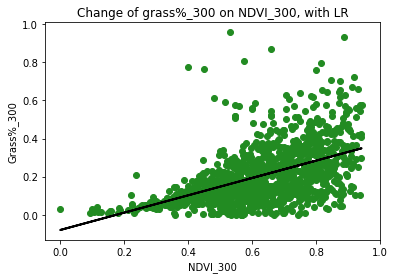

In [76]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of grass%_300 on NDVI_300, with LR')
plt.xlabel('NDVI_300')
plt.ylabel('Grass%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_grass_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.3.2. Generalized Additive Model (GAM)

In [77]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Grass%_300
target_300 = pd.DataFrame(gdf_300, columns=['Grass%_300'])

# define X and Y
X = df_300
y = target_300['Grass%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_grass_300 = LinearGAM(s(0)).fit(X_train, y_train)

gam_grass_300.gridsearch(X_train, y_train)
gam_grass_300.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.6321
Link Function:                     IdentityLink Log Likelihood:                               -121753.5413
Number of Samples:                         4688 AIC:                                           243524.3468
                                                AICc:                                          243524.3823
                                                GCV:                                                0.0172
                                                Scale:                                              0.0171
                                                Pseudo R-Squared:                                   0.2482
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/3293065087.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_grass_300.summary()


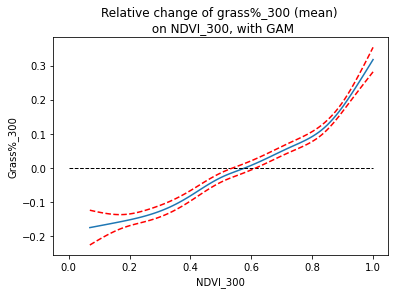

In [78]:
# plotting
for i, term in enumerate(gam_grass_300.terms):
    if term.isintercept:
        continue

    XX = gam_grass_300.generate_X_grid(term=i)
    pdep, confi = gam_grass_300.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of grass%_300 (mean) \n on NDVI_300, with GAM')
    plt.xlabel('NDVI_300')
    plt.ylabel('Grass%_300')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_grass_300_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [79]:
# Change in low NDVI values: how does Grass% increase, if NDVI changes from 0.25 to 0.35?
grass_l0 = gam_grass_300.predict(0.25)
grass_l1 = gam_grass_300.predict(0.35)
grass_sens_low_300 = float(grass_l1 - grass_l0)
print('If NDVI goes from 0.25 to 0.35, Grass%_300 increases by:', grass_sens_low_300)

If NDVI goes from 0.25 to 0.35, Grass%_300 increases by: 0.034178745396636304


In [80]:
# Change in mid NDVI values: how does Grass% increase, if NDVI changes from 0.45 to 0.55?
grass_m0 = gam_grass_300.predict(0.45)
grass_m1 = gam_grass_300.predict(0.55)
grass_sens_mid_300 = float(grass_m1 - grass_m0)
print('If NDVI goes from 0.45 to 0.55, Grass%_300 increases by:', grass_sens_mid_300)

If NDVI goes from 0.45 to 0.55, Grass%_300 increases by: 0.04354067562250222


In [81]:
# Change in hig NDVI values: how does Grass% increase, if NDVI changes from 0.65 to 0.75?
grass_h0 = gam_grass_300.predict(0.65)
grass_h1 = gam_grass_300.predict(0.75)
grass_sens_hig_300 = float(grass_h1 - grass_h0)
print('If NDVI goes from 0.65 to 0.75, Grass%_300 increases by:', grass_sens_hig_300)

If NDVI goes from 0.65 to 0.75, Grass%_300 increases by: 0.041811506570193946


### 2.4. How does NDVI predict Shrubs%?

#### 2.4.1. Linear Regression Model

In [82]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Shrubs%_300
target_300 = pd.DataFrame(gdf_300, columns=['Shrubs%_300'])

# define X and y
X = df_300
y = target_300['Shrubs%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_300 = linear_model.LinearRegression()
model_300 = lm_300.fit(X_train,y_train)

In [83]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_300 (or slope):', model_300.coef_)
print('Intercept:', model_300.intercept_)
print('R-squared:', model_300.score(X_train,y_train))

Coefficient of NDVI_300 (or slope): [0.62761968]
Intercept: -0.054643220531015835
R-squared: 0.1814034275877089


In [84]:
# make predictions
y_pred = model_300.predict(X_test)

# compare actual values with predicted ones
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values
X_test = X_test.iloc[:, 0:1].values

In [85]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15208555808253804
Mean Squared Error: 0.045524215164118156
Root Mean Squared Error: 0.2133640437471088


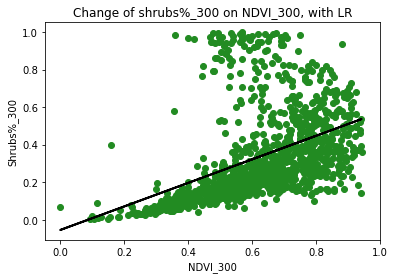

In [86]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of shrubs%_300 on NDVI_300, with LR')
plt.xlabel('NDVI_300')
plt.ylabel('Shrubs%_300')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_shrubs_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 2.4.2. Generalized Additive Model (GAM)

In [87]:
# data/predictors as the NDVI_300
df_300 = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# target as Shrubs%_300
target_300 = pd.DataFrame(gdf_300, columns=['Shrubs%_300'])

# define X and y
X = df_300
y = target_300['Shrubs%_300']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_shrubs_300 = LinearGAM(s(0)).fit(X_train, y_train)

gam_shrubs_300.gridsearch(X_train, y_train)
gam_shrubs_300.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.7893
Link Function:                     IdentityLink Log Likelihood:                                 -40026.441
Number of Samples:                         4688 AIC:                                            80074.4606
                                                AICc:                                            80074.515
                                                GCV:                                                0.0469
                                                Scale:                                              0.0467
                                                Pseudo R-Squared:                                    0.192
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/1454074008.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_shrubs_300.summary()


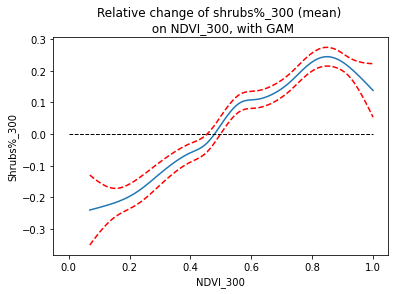

In [88]:
# plotting
for i, term in enumerate(gam_shrubs_300.terms):
    if term.isintercept:
        continue

    XX = gam_shrubs_300.generate_X_grid(term=i)
    pdep, confi = gam_shrubs_300.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
 #   plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of shrubs%_300 (mean) \n on NDVI_300, with GAM')
    plt.xlabel('NDVI_300')
    plt.ylabel('Shrubs%_300')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_shrubs_300_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [89]:
# Change in low NDVI values: how does shrubs% increase, if NDVI changes from 0.25 to 0.35?
shrubs_l0 = gam_shrubs_300.predict(0.25)
shrubs_l1 = gam_shrubs_300.predict(0.35)
shrubs_sens_low_300 = float(shrubs_l1 - shrubs_l0)
print('If NDVI goes from 0.25 to 0.35, shrubs%_300 increases by:', shrubs_sens_low_300)

If NDVI goes from 0.25 to 0.35, shrubs%_300 increases by: 0.07724895435371407


In [90]:
# Change in mid NDVI values: how does shrubs% increase, if NDVI changes from 0.45 to 0.55?
shrubs_m0 = gam_shrubs_300.predict(0.45)
shrubs_m1 = gam_shrubs_300.predict(0.55)
shrubs_sens_mid_300 = float(shrubs_m1 - shrubs_m0)
print('If NDVI goes from 0.45 to 0.55, shrubs%_300 increases by:', shrubs_sens_mid_300)

If NDVI goes from 0.45 to 0.55, shrubs%_300 increases by: 0.12214665619742704


In [91]:
# Change in high NDVI values: how does shrubs% increase, if NDVI changes from 0.65 to 0.75?
shrubs_h0 = gam_shrubs_300.predict(0.65)
shrubs_h1 = gam_shrubs_300.predict(0.75)
shrubs_sens_hig_300 = float(shrubs_h1 - shrubs_h0)
print('If NDVI goes from 0.65 to 0.75, shrubs%_300 increases by:', shrubs_sens_hig_300)

If NDVI goes from 0.65 to 0.75, shrubs%_300 increases by: 0.0676309094497004


### 2.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [92]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
df = pd.DataFrame(gdf_300, columns=cols)

# target as NDVI_300
target = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# define X and Y
X = df
y = target['NDVI_300']
#X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model candidate 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_ndvi_300 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_ndvi_300.gridsearch(X_train, y_train, lam=lams)
gam_ndvi_300.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     38.1212
Link Function:                     IdentityLink Log Likelihood:                               -410206.2272
Number of Samples:                         4688 AIC:                                           820490.6967
                                                AICc:                                          820491.3721
                                                GCV:                                                0.0055
                                                Scale:                                              0.0054
                                                Pseudo R-Squared:                                   0.7983
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/863347675.py:25: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_ndvi_300.summary()


<Figure size 432x288 with 0 Axes>

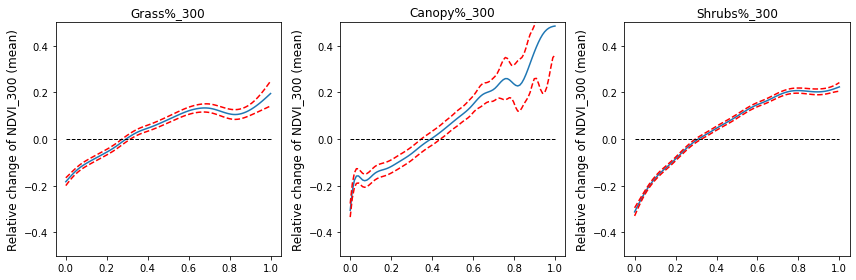

In [93]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3, figsize=(12,4));

titles = ['Grass%_300', 'Canopy%_300', 'Shrubs%_300']
for i, ax in enumerate(axs):
    XX = gam_ndvi_300.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_ndvi_300.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_ndvi_300.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_300 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_300_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 3. Modelling greenspace metrics at 500m

In [94]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_500_df.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,Grass%_500,Shrubs%_500,geometry
0,0.616906,0.714233,0.509538,0.305474,0.177276,POINT (377098.736 391409.893)
1,0.535196,0.518279,0.272543,0.170375,0.244285,POINT (388776.738 395338.550)
2,0.625744,0.665035,0.458237,0.265076,0.194620,POINT (385102.497 389586.914)
3,0.869751,0.959438,0.194798,0.637881,0.401261,POINT (358860.328 409008.505)
4,0.855770,0.984456,0.180780,0.170082,0.213244,POINT (369877.609 414278.479)


### 3.1. How does NDVI predict Greenspace%?

#### 3.1.1. Linear Regression Model

In [95]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [96]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [1.06157709]
Intercept: 0.027196195196588335
R-squared: 0.6671389526803173


In [97]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [98]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08481598514536061
Mean Squared Error: 0.014419213853796974
Root Mean Squared Error: 0.12008003103679218


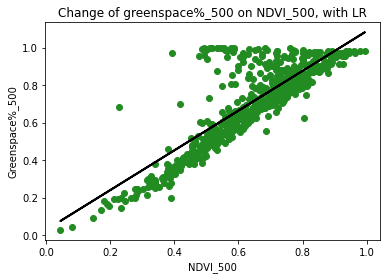

In [99]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of greenspace%_500 on NDVI_500, with LR')
plt.xlabel('NDVI_500')
plt.ylabel('Greenspace%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_greenspace_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [100]:
# Change in NDVI values: how does Greenspace% increase, if NDVI changes from 0.3 to 0.4?
green0 = model_500.predict([[0.3]])
green1 = model_500.predict([[0.4]])
print('If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by:', green1 - green0)

If NDVI goes from 0.3 to 0.4, Greenspace%_100 increases by: [0.10615771]


/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Applications/anaconda3/envs/ssml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 3.1.2. Generalized Additive Model (GAM)

In [101]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Greenspace%_500
target = pd.DataFrame(gdf_500, columns=['Greenspace%_500'])

# define X and Y
X = df
y = target['Greenspace%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_greenspace_500 = LinearGAM(s(0)).fit(X_train, y_train)

gam_greenspace_500.gridsearch(X_train, y_train)
gam_greenspace_500.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.7962
Link Function:                     IdentityLink Log Likelihood:                                -65532.5424
Number of Samples:                         2318 AIC:                                           131084.6772
                                                AICc:                                          131084.7688
                                                GCV:                                                0.0159
                                                Scale:                                              0.0158
                                                Pseudo R-Squared:                                    0.688
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/4139878652.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_greenspace_500.summary()


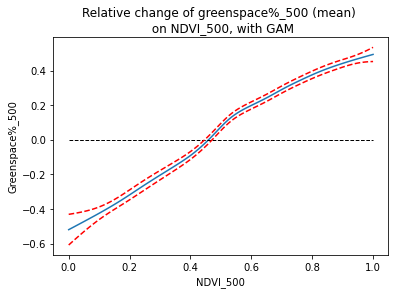

In [102]:
# plotting
for i, term in enumerate(gam_greenspace_500.terms):
    if term.isintercept:
        continue

    XX = gam_greenspace_500.generate_X_grid(term=i)
    pdep, confi = gam_greenspace_500.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of greenspace%_500 (mean) \n on NDVI_500, with GAM')
    plt.xlabel('NDVI_500')
    plt.ylabel('Greenspace%_500')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_greenspace_500_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [103]:
# Change in low NDVI values: how does Greenspace% increase, if NDVI changes from 0.25 to 0.35?
green_l0 = gam_greenspace_500.predict(0.25)
green_l1 = gam_greenspace_500.predict(0.35)
green_sens_low_500 = float(green_l1 - green_l0)
print('If NDVI goes from 0.25 to 0.35, Greenspace%_500 increases by:', green_sens_low_500)

If NDVI goes from 0.25 to 0.35, Greenspace%_500 increases by: 0.11047695982508077


In [104]:
# Change in medium NDVI values: how does Greenspace% increase, if NDVI changes from 0.45 to 0.55?
green_m0 = gam_greenspace_500.predict(0.45)
green_m1 = gam_greenspace_500.predict(0.55)
green_sens_mid_500 = float(green_m1 - green_m0)
print('If NDVI goes from 0.45 to 0.55, Greenspace%_500 increases by:', green_sens_mid_500)

If NDVI goes from 0.45 to 0.55, Greenspace%_500 increases by: 0.1664203077071046


In [105]:
# Change in high NDVI values: how does Greenspace% increase, if NDVI changes from 0.65 to 0.75?
green_h0 = gam_greenspace_500.predict(0.65)
green_h1 = gam_greenspace_500.predict(0.75)
green_sens_hig_500 = float(green_h1 - green_h0)
print('If NDVI goes from 0.65 to 0.75, Greenspace%_500 increases by:', green_sens_hig_500)

If NDVI goes from 0.65 to 0.75, Greenspace%_500 increases by: 0.0926203126422982


### 3.2. How does NDVI predict Canopy%?

#### 3.2.1. Linear Regression Model

In [106]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Greenspace%_300 as the target
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [107]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [0.17223623]
Intercept: 0.1883535321928857
R-squared: 0.029635927315832977


In [108]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [109]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12667404891735237
Mean Squared Error: 0.025598064475646075
Root Mean Squared Error: 0.15999395137206304


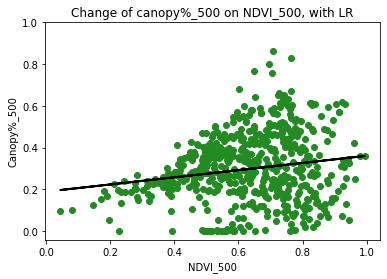

In [110]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of canopy%_500 on NDVI_500, with LR')
plt.xlabel('NDVI_500')
plt.ylabel('Canopy%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_canopy_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.2.2. Generalized Additive Model (GAM)

In [111]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Canopy%_500
target = pd.DataFrame(gdf_500, columns=['Canopy%_500'])

# define X and Y
X = df
y = target['Canopy%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_canopy_500 = LinearGAM(s(0)).fit(X_train, y_train)

gam_canopy_500.gridsearch(X_train, y_train)
gam_canopy_500.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       5.198
Link Function:                     IdentityLink Log Likelihood:                                -34774.5523
Number of Samples:                         2318 AIC:                                            69561.5005
                                                AICc:                                           69561.5391
                                                GCV:                                                0.0284
                                                Scale:                                              0.0283
                                                Pseudo R-Squared:                                   0.0572
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/1847518293.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_canopy_500.summary()


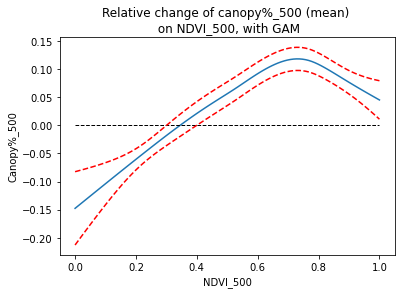

In [112]:
# plotting
for i, term in enumerate(gam_canopy_500.terms):
    if term.isintercept:
        continue

    XX = gam_canopy_500.generate_X_grid(term=i)
    pdep, confi = gam_canopy_500.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of canopy%_500 (mean) \n on NDVI_500, with GAM')
    plt.xlabel('NDVI_500')
    plt.ylabel('Canopy%_500')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_canopy_500_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [113]:
# Change in low NDVI values: how does Canopy% increase, if NDVI changes from 0.25 to 0.35?
canopy_l0 = gam_canopy_500.predict(0.25)
canopy_l1 = gam_canopy_500.predict(0.35)
canopy_sens_low_500 = float(canopy_l1 - canopy_l0)
print('If NDVI goes from 0.25 to 0.35, canopy%_500 increases by:', canopy_sens_low_500)

If NDVI goes from 0.25 to 0.35, canopy%_500 increases by: 0.04109111787259234


In [114]:
# Change in medium NDVI values: how does canopy% increase, if NDVI changes from 0.45 to 0.55?
canopy_m0 = gam_canopy_500.predict(0.45)
canopy_m1 = gam_canopy_500.predict(0.55)
canopy_sens_mid_500 = float(canopy_m1 - canopy_m0)
print('If NDVI goes from 0.45 to 0.55, canopy%_500 increases by:', canopy_sens_mid_500)

If NDVI goes from 0.45 to 0.55, canopy%_500 increases by: 0.03488364838650648


In [115]:
# Change in high NDVI values: how does canopy% increase, if NDVI changes from 0.65 to 0.75?
canopy_h0 = gam_canopy_500.predict(0.65)
canopy_h1 = gam_canopy_500.predict(0.75)
canopy_sens_hig_500 = float(canopy_h1 - canopy_h0)
print('If NDVI goes from 0.65 to 0.75, canopy%_500 increases by:', canopy_sens_hig_500)

If NDVI goes from 0.65 to 0.75, canopy%_500 increases by: 0.01057659406173278


### 3.3. How does NDVI predict Grass%?

#### 3.3.1. Linear Regression Model

In [116]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Grass%_500 as the target
target = pd.DataFrame(gdf_500, columns=['Grass%_500'])

# define X and y
X = df
y = target['Grass%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [117]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [0.47692271]
Intercept: -0.05747867199924933
R-squared: 0.30354565185752735


In [118]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [119]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0801137233733905
Mean Squared Error: 0.01252795906039497
Root Mean Squared Error: 0.11192836575415085


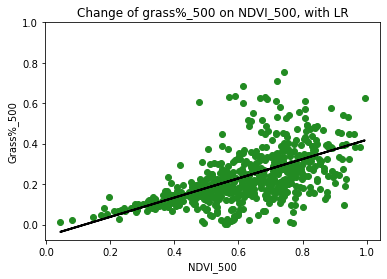

In [120]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of grass%_500 on NDVI_500, with LR')
plt.xlabel('NDVI_500')
plt.ylabel('Grass%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_grass_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.3.2. Generalized Additive Model (GAM)

In [121]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Grass%_500
target = pd.DataFrame(gdf_500, columns=['Grass%_500'])

# define X and Y
X = df
y = target['Grass%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_grass_500 = LinearGAM(s(0)).fit(X_train, y_train)

gam_grass_500.gridsearch(X_train, y_train)
gam_grass_500.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9675
Link Function:                     IdentityLink Log Likelihood:                                -66656.3929
Number of Samples:                         2318 AIC:                                           133322.7208
                                                AICc:                                          133322.7464
                                                GCV:                                                0.0156
                                                Scale:                                              0.0156
                                                Pseudo R-Squared:                                   0.3046
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/2139372779.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_grass_500.summary()


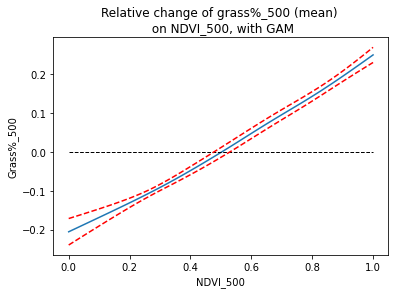

In [122]:
# plotting
for i, term in enumerate(gam_grass_500.terms):
    if term.isintercept:
        continue

    XX = gam_grass_500.generate_X_grid(term=i)
    pdep, confi = gam_grass_500.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of grass%_500 (mean) \n on NDVI_500, with GAM')
    plt.xlabel('NDVI_500')
    plt.ylabel('Grass%_500')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_grass_500_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [123]:
# Change in low NDVI values: how does grass% increase, if NDVI changes from 0.25 to 0.35?
grass_l0 = gam_grass_500.predict(0.25)
grass_l1 = gam_grass_500.predict(0.35)
grass_sens_low_500 = float(grass_l1 - grass_l0)
print('If NDVI goes from 0.25 to 0.35, grass%_500 increases by:', grass_sens_low_500)

If NDVI goes from 0.25 to 0.35, grass%_500 increases by: 0.04137967329645956


In [124]:
# Change in medium NDVI values: how does grass% increase, if NDVI changes from 0.45 to 0.55?
grass_m0 = gam_grass_500.predict(0.45)
grass_m1 = gam_grass_500.predict(0.55)
grass_sens_mid_500 = float(grass_m1 - grass_m0)
print('If NDVI goes from 0.45 to 0.55, grass%_500 increases by:', grass_sens_mid_500)

If NDVI goes from 0.45 to 0.55, grass%_500 increases by: 0.048008475472902434


In [125]:
# Change in high NDVI values: how does grass% increase, if NDVI changes from 0.65 to 0.75?
grass_h0 = gam_grass_500.predict(0.65)
grass_h1 = gam_grass_500.predict(0.75)
grass_sens_hig_500 = float(grass_h1 - grass_h0)
print('If NDVI goes from 0.65 to 0.75, grass%_500 increases by:', grass_sens_hig_500)

If NDVI goes from 0.65 to 0.75, grass%_500 increases by: 0.04714817613866579


### 3.4. How does NDVI predict Shrubs%?

#### 3.4.1. Linear Regression Model

In [126]:
# NDVI_500 as the predictor
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# Shrubs%_500 as the target
target = pd.DataFrame(gdf_500, columns=['Shrubs%_500'])

# define X and y
X = df
y = target['Shrubs%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear model
lm_500 = linear_model.LinearRegression()
model_500 = lm_500.fit(X_train,y_train)

In [127]:
# linear model coefficient, intercept, and R-squared 
print('Coefficient of NDVI_500 (or slope):', model_500.coef_)
print('Intercept:', model_500.intercept_)
print('R-squared:', model_500.score(X_train,y_train))

Coefficient of NDVI_500 (or slope): [0.5244964]
Intercept: -0.0022765034762127767
R-squared: 0.1673164051679844


In [128]:
# make predictions
y_pred = model_500.predict(X_test)

# compare actual values with predicted ones
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# convert X_test to array values (for later use when plotting)
X_test = X_test.iloc[:, 0:1].values

In [129]:
# evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1346745633580186
Mean Squared Error: 0.038184439145696414
Root Mean Squared Error: 0.19540839067372828


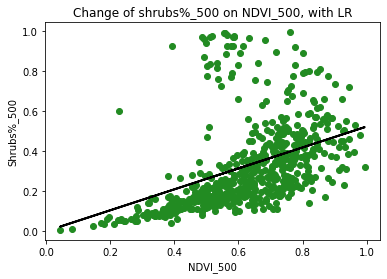

In [130]:
# plot outputs
plt.scatter(X_test, y_test, color="forestgreen")
plt.plot(X_test, y_pred, color="black", linewidth=2)

plt.xticks(np.arange(0, 1.1, step = 0.2))
plt.yticks(np.arange(0, 1.1, step = 0.2))

# set title, xlabel and ylabel
plt.title('Change of shrubs%_500 on NDVI_500, with LR')
plt.xlabel('NDVI_500')
plt.ylabel('Shrubs%_500')

# save the figure
plt.savefig('thesis_project/visualizations/modelling/lr_shrubs_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

#### 3.4.2. Generalized Additive Model (GAM)

In [131]:
# data/predictors as the NDVI_500
df = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# target as Shrubs%_500
target = pd.DataFrame(gdf_500, columns=['Shrubs%_500'])

# define X and Y
X = df
y = target['Shrubs%_500']

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_shrubs_500 = LinearGAM(s(0)).fit(X_train, y_train)

gam_shrubs_500.gridsearch(X_train, y_train)
gam_shrubs_500.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.7962
Link Function:                     IdentityLink Log Likelihood:                                -23221.4333
Number of Samples:                         2318 AIC:                                            46462.4589
                                                AICc:                                           46462.5506
                                                GCV:                                                0.0408
                                                Scale:                                              0.0405
                                                Pseudo R-Squared:                                   0.1794
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/2264749580.py:19: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_shrubs_500.summary()


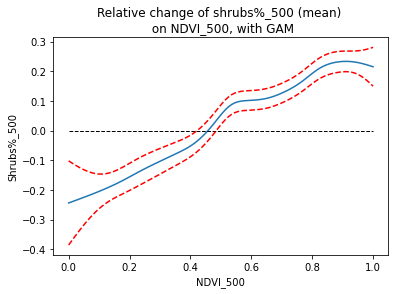

In [132]:
# plotting
for i, term in enumerate(gam_shrubs_500.terms):
    if term.isintercept:
        continue

    XX = gam_shrubs_500.generate_X_grid(term=i)
    pdep, confi = gam_shrubs_500.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
#    plt.ylim(-0.5, 0.5)
    # set title, xlabel and ylabel
    plt.title('Relative change of shrubs%_500 (mean) \n on NDVI_500, with GAM')
    plt.xlabel('NDVI_500')
    plt.ylabel('Shrubs%_500')
    # save the figure
    plt.savefig('thesis_project/visualizations/modelling/gam_shrubs_500_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

In [133]:
# Change in low NDVI values: how does shrubs% increase, if NDVI changes from 0.25 to 0.35?
shrubs_l0 = gam_shrubs_500.predict(0.25)
shrubs_l1 = gam_shrubs_500.predict(0.35)
shrubs_sens_low_500 = float(shrubs_l1 - shrubs_l0)
print('If NDVI goes from 0.25 to 0.35, shrubs%_500 increases by:', shrubs_sens_low_500)

If NDVI goes from 0.25 to 0.35, shrubs%_500 increases by: 0.04947840922372468


In [134]:
# Change in medium NDVI values: how does shrubs% increase, if NDVI changes from 0.45 to 0.55?
shrubs_m0 = gam_shrubs_500.predict(0.45)
shrubs_m1 = gam_shrubs_500.predict(0.55)
shrubs_sens_mid_500 = float(shrubs_m1 - shrubs_m0)
print('If NDVI goes from 0.45 to 0.55, shrubs%_500 increases by:', shrubs_sens_mid_500)

If NDVI goes from 0.45 to 0.55, shrubs%_500 increases by: 0.10366540398313567


In [135]:
# Change in high NDVI values: how does shrubs% increase, if NDVI changes from 0.65 to 0.75?
shrubs_h0 = gam_shrubs_500.predict(0.65)
shrubs_h1 = gam_shrubs_500.predict(0.75)
shrubs_sens_hig_500 = float(shrubs_h1 - shrubs_h0)
print('If NDVI goes from 0.65 to 0.75, shrubs%_500 increases by:', shrubs_sens_hig_500)

If NDVI goes from 0.65 to 0.75, shrubs%_500 increases by: 0.04532026594024574


### 3.5. How do Grass%, Canopy%, and Shrubs% predict NDVI?

In [136]:
# data/predictors as Grass%, Canopy%, and Shrubs%
cols = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
df = pd.DataFrame(gdf_500, columns=cols)

# target as NDVI_500
target = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# define X and Y
X = df
y = target['NDVI_500']
#X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# GAM model candidate 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
gam_ndvi_500 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas indvidually
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

gam_ndvi_500.gridsearch(X_train, y_train, lam=lams)
gam_ndvi_500.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:05 Time:  0:00:05


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       30.37
Link Function:                     IdentityLink Log Likelihood:                               -182891.8423
Number of Samples:                         2318 AIC:                                           365846.4248
                                                AICc:                                          365847.3133
                                                GCV:                                                0.0061
                                                Scale:                                              0.0059
                                                Pseudo R-Squared:                                   0.8039
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_3570/3143020320.py:25: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_ndvi_500.summary()


<Figure size 432x288 with 0 Axes>

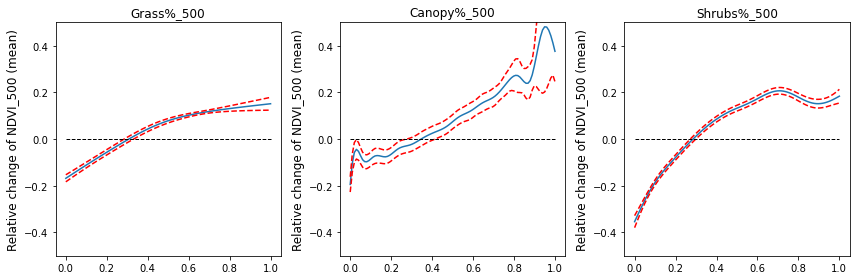

In [137]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3, figsize=(12,4));

titles = ['Grass%_500', 'Canopy%_500', 'Shrubs%_500']
for i, ax in enumerate(axs):
    XX = gam_ndvi_500.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_ndvi_500.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam_ndvi_500.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.5, 0.5)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Relative change of NDVI_500 (mean)', fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/gam_ndvi_500_plot.png', dpi=300, bbox_inches='tight')

plt.show()

## 4. Prediction sensitivity to changes in low, mid, and high NDVI values

### 4.1. At 100m

In [138]:
# vegetation metrics sensitivity to changes in NDVI
data_100 = {'Changes in NDVI': ['Low-range (0.25 to 0.35)', 'Mid-range (0.45 to 0.55)', 'High-range (0.65 to 0.75)'], 
        'Greenspace%_100': [green_sens_low, green_sens_mid, green_sens_hig],
        'Grass%_100': [grass_sens_low, grass_sens_mid, grass_sens_hig],
        'Canopy%_100': [canopy_sens_low, canopy_sens_mid, canopy_sens_hig], 
        'Shrubs%_100': [shrubs_sens_low, shrubs_sens_mid, shrubs_sens_hig]}  
  
# create DataFrame  
df_sens_100 = pd.DataFrame(data_100)
df_sens_100 = df_sens_100.round(5)
df_sens_100.head()

,Changes in NDVI,Greenspace%_100,Grass%_100,Canopy%_100,Shrubs%_100
0,Low-range (0.25 to 0.35),0.10103,0.01087,0.03760,0.06083
1,Mid-range (0.45 to 0.55),0.21571,0.06220,0.04417,0.11102
2,High-range (0.65 to 0.75),0.15325,0.01754,0.06734,0.07657


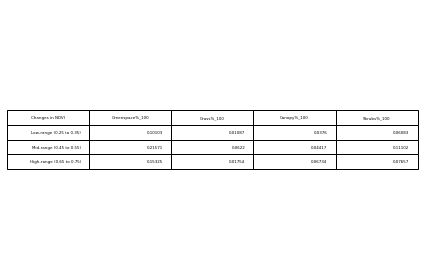

In [139]:
# plotting
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_sens_100.values, colLabels=df_sens_100.columns, loc='center')

fig.tight_layout()

# save the figure
plt.savefig('thesis_project/visualizations/modelling/sensitivity_100_table.png', dpi=300, bbox_inches='tight')

plt.show()

### 4.2. At 300m

In [140]:
# vegetation metrics sensitivity to changes in NDVI
data_300 = {'Changes in NDVI': ['Low-range (0.25 to 0.35)', 'Mid-range (0.45 to 0.55)', 'High-range (0.65 to 0.75)'], 
        'Greenspace%_300': [green_sens_low_300, green_sens_mid_300, green_sens_hig_300],
        'Grass%_300': [grass_sens_low_300, grass_sens_mid_300, grass_sens_hig_300],
        'Canopy%_300': [canopy_sens_low_300, canopy_sens_mid_300, canopy_sens_hig_300], 
        'Shrubs%_300': [shrubs_sens_low_300, shrubs_sens_mid_300, shrubs_sens_hig_300]}  
  
# create DataFrame  
df_sens_300 = pd.DataFrame(data_300)
df_sens_300 = df_sens_300.round(4)
df_sens_300.head()

,Changes in NDVI,Greenspace%_300,Grass%_300,Canopy%_300,Shrubs%_300
0,Low-range (0.25 to 0.35),0.1361,0.0342,0.0375,0.0772
1,Mid-range (0.45 to 0.55),0.1762,0.0435,0.0320,0.1221
2,High-range (0.65 to 0.75),0.0992,0.0418,0.0028,0.0676


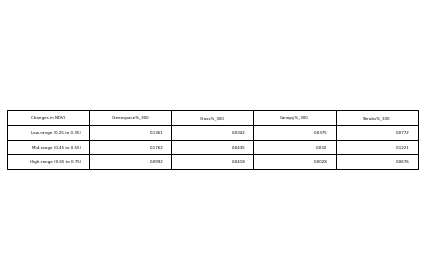

In [141]:
# plotting
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_sens_300.values, colLabels=df_sens_300.columns, loc='center')

fig.tight_layout()

# save the figure
plt.savefig('thesis_project/visualizations/modelling/sensitivity_300_table.png', dpi=300, bbox_inches='tight')

plt.show()

### 4.3. At 500m

In [142]:
# vegetation metrics sensitivity to changes in NDVI
data_500 = {'Changes in NDVI': ['Low-range (0.25 to 0.35)', 'Mid-range (0.45 to 0.55)', 'High-range (0.65 to 0.75)'], 
        'Greenspace%_500': [green_sens_low_500, green_sens_mid_500, green_sens_hig_500],
        'Grass%_500': [grass_sens_low_500, grass_sens_mid_500, grass_sens_hig_500],
        'Canopy%_500': [canopy_sens_low_500, canopy_sens_mid_500, canopy_sens_hig_500], 
        'Shrubs%_500': [shrubs_sens_low_500, shrubs_sens_mid_500, shrubs_sens_hig_500]}  
  
# create DataFrame  
df_sens_500 = pd.DataFrame(data_500)
df_sens_500 = df_sens_500.round(4)
df_sens_500.head()

,Changes in NDVI,Greenspace%_500,Grass%_500,Canopy%_500,Shrubs%_500
0,Low-range (0.25 to 0.35),0.1105,0.0414,0.0411,0.0495
1,Mid-range (0.45 to 0.55),0.1664,0.0480,0.0349,0.1037
2,High-range (0.65 to 0.75),0.0926,0.0471,0.0106,0.0453


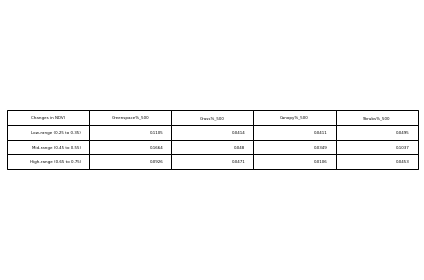

In [143]:
# plotting
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=df_sens_500.values, colLabels=df_sens_500.columns, loc='center')

fig.tight_layout()

# save the figure
plt.savefig('thesis_project/visualizations/modelling/sensitivity_500_table.png', dpi=300, bbox_inches='tight')

plt.show()